#Correlation vs mode number

In [8]:
%matplotlib inline
import sys
sys.path.append('/home/photon/code/PylonCCD')
import numpy as np
import Qfunction as Qfunc
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import listdir, path, chdir

In [9]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [10]:
#Use this to pull from a different day:
data_folder = "/home/photon/data/05-30-2018"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)

In [11]:
ls

10-52-53_raw.npz  11-11-58_raw.npz  11-31-08_raw.npz  14-18-18_raw.npz
11-00-35_raw.npz  11-17-49_raw.npz  11-36-56_raw.npz
11-06-22_raw.npz  11-24-20_raw.npz  11-42-01_raw.npz


In [12]:
allFiles = listdir(data_folder)
allFiles.sort()
zip(allFiles,range(len(allFiles)))

[('10-52-53_raw.npz', 0),
 ('11-00-35_raw.npz', 1),
 ('11-06-22_raw.npz', 2),
 ('11-11-58_raw.npz', 3),
 ('11-17-49_raw.npz', 4),
 ('11-24-20_raw.npz', 5),
 ('11-31-08_raw.npz', 6),
 ('11-36-56_raw.npz', 7),
 ('11-42-01_raw.npz', 8),
 ('14-18-18_raw.npz', 9)]

In [37]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[3])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [62]:
modeA = 410
offset = 300
size = 100
modes = range(0,size)

output = scaled_vc[modeA,:,:].flatten()  # Choose the mode to analyze
x = np.real(output)
y = np.imag(output)

Pearson = np.zeros(size, dtype = np.complex)
theta = []
photonNumber = []

for i in modes:
    
        RealPearson, p = sp.pearsonr(np.real(scaled_vc[i].flatten()), x)
        ImagPearson, p = sp.pearsonr(np.imag(scaled_vc[i].flatten()), y)
        Pearson[i] = RealPearson + ImagPearson*1j
        #Pearson_real.append(RealPearson)
        #Pearson_imag.append(ImagPearson)
        theta.append(modes[i] * (780e-9*1000)/(600*20e-6))
        photonNumber.append(0.5*(np.average(np.abs(scaled_vc[i])))**2)
    

In [63]:
# Calculate the complex correlation matrix between each mode.
modes = range(0,size)

PearsonMatrix = np.zeros((size,size),dtype=np.complex)

for i in modes:
    output = scaled_vc[i+offset,:,:].flatten()  # Choose the mode to analyze
    x = np.real(output)
    y = np.imag(output)
    for k in modes:
        PearsonReal, p = sp.pearsonr(np.real(scaled_vc[k].flatten()), x)
        PearsonImag, p = sp.pearsonr(np.imag(scaled_vc[k].flatten()), y)
        PearsonMatrix[i,k] = PearsonReal + PearsonImag*1j

In [64]:
# Calculate the correlation matrix between magnitude of each mode.
modes = range(0,size)

PearsonMagnitude = np.zeros((size,size))

for i in modes:
    output = scaled_vc[i+offset,:,:].flatten()  # Choose the mode to analyze
    x = np.abs(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.abs(scaled_vc[k].flatten()), x)
        PearsonMagnitude[i,k] = Pearson

In [65]:
# Calculate the correlation matrix between phase of each mode.
modes = range(0,size)

PearsonPhase = np.zeros((size,size))

for i in modes:
    output = scaled_vc[i+offset,:,:].flatten()  # Choose the mode to analyze
    x = np.angle(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.angle(scaled_vc[k].flatten()), x)
        PearsonPhase[i,k] = Pearson

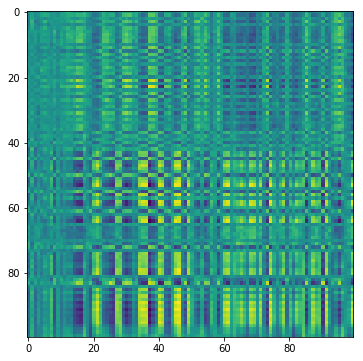

In [66]:
plt.imshow(PearsonPhase,interpolation='none')

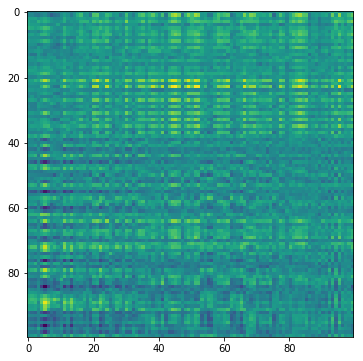

In [67]:
plt.imshow(PearsonMagnitude,interpolation='none')

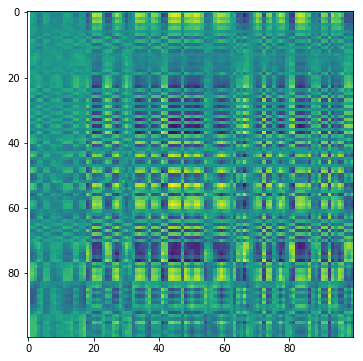

In [68]:
plt.imshow(np.real(PearsonMatrix),interpolation='none')

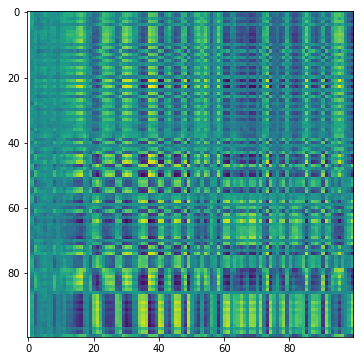

In [69]:
plt.imshow(np.imag(PearsonMatrix),interpolation='none')

In [23]:
np.real(PearsonMatrix[170:230,170:230])

array([[ 1.        ,  0.14061687,  0.14813318, ..., -0.40482618,
        -0.31464864, -0.08127394],
       [ 0.14061687,  1.        ,  0.07107444, ..., -0.07523688,
        -0.10052318,  0.06865104],
       [ 0.14813318,  0.07107444,  1.        , ...,  0.08514403,
        -0.10930001, -0.30612457],
       ...,
       [-0.40482618, -0.07523688,  0.08514403, ...,  1.        ,
         0.39272574, -0.05868363],
       [-0.31464864, -0.10052318, -0.10930001, ...,  0.39272574,
         1.        ,  0.2795762 ],
       [-0.08127394,  0.06865104, -0.30612457, ..., -0.05868363,
         0.2795762 ,  1.        ]])

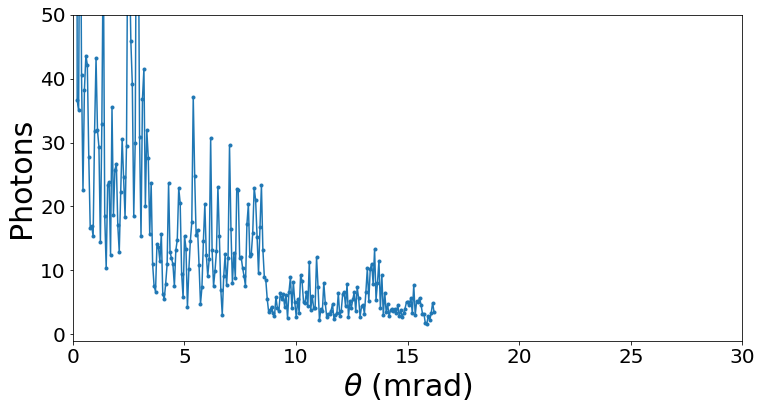

In [27]:
plt.plot(theta, photonNumber ,".-")
plt.xlabel("$\\theta$ (mrad)",fontsize=30)
plt.ylabel("Photons",fontsize=30)
plt.xlim((0,30))
plt.ylim((-1,50))
plt.tick_params(labelsize=20)

[9, 15, -1.1, 1.1]

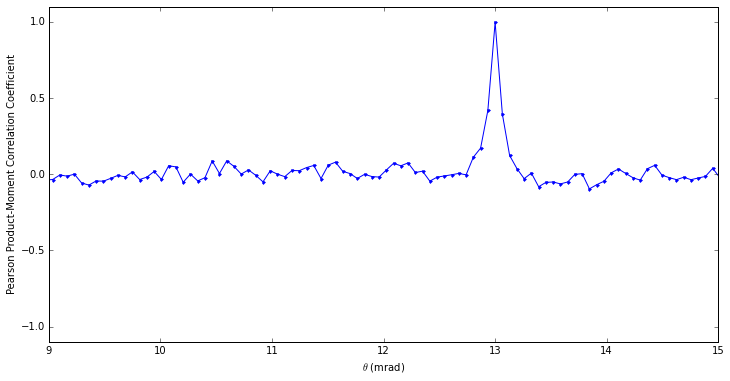

In [104]:
plt.plot(theta,PearsonMatrix[200,:].real,".-")
#plot(theta,Pearson_imagF,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

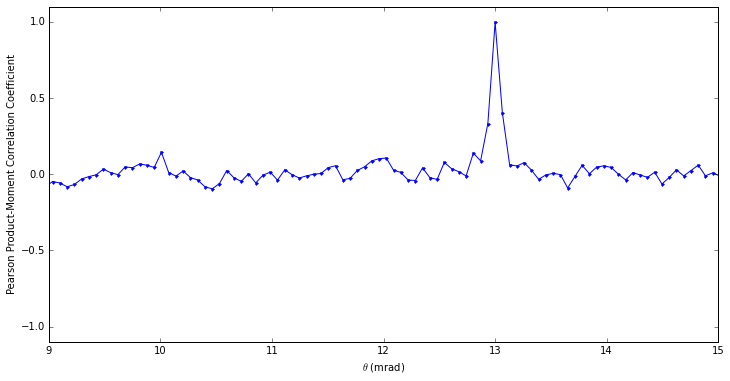

In [105]:
plt.plot(theta,PearsonMatrix[200,:].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

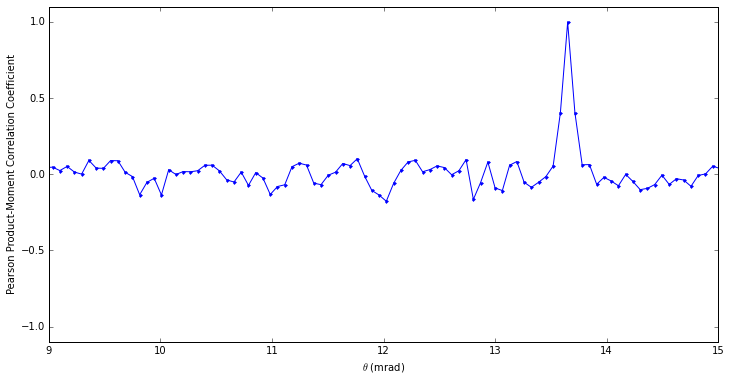

In [106]:
plt.plot(theta,PearsonMatrix[210,:].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])